Accuracy with Euclidean distance (without sklearn): 0.6461538461538462
Accuracy with Manhattan distance (without sklearn): 0.676923076923077
[7, 2, 3, 2, 1, 2, 1, 1, 2, 1, 1, 2, 3, 1, 1, 1, 5, 2, 7, 2, 1, 1, 5, 1, 1, 1, 3, 3, 3, 1, 6, 5, 2, 5, 1, 5, 7, 1, 7, 6, 2, 3, 1, 2, 1, 1, 2, 5, 1, 7, 2, 1, 7, 1, 3, 3, 1, 6, 3, 7, 1, 7, 1, 2, 7]
[5, 2, 3, 2, 1, 2, 1, 1, 2, 1, 1, 2, 3, 1, 1, 3, 5, 2, 7, 2, 1, 1, 5, 1, 1, 1, 3, 3, 3, 1, 7, 5, 2, 5, 3, 5, 7, 1, 7, 2, 2, 1, 1, 2, 1, 1, 2, 5, 3, 7, 2, 1, 7, 1, 1, 3, 1, 6, 1, 7, 1, 7, 1, 5, 7]


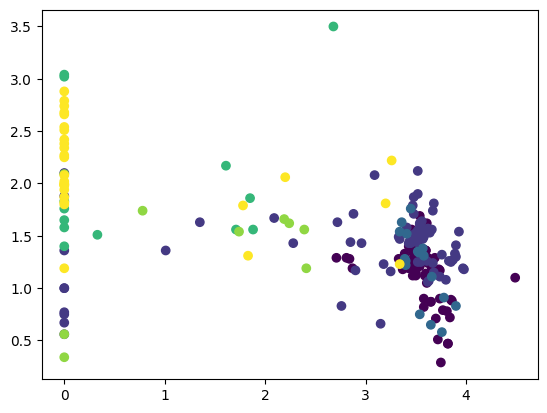

In [2]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))
class KNN:
    def __init__(self, k, distance_fn):
        self.k = k
        self.distance_fn = distance_fn

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        distances = [self.distance_fn(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

df = pd.read_csv('glass.csv')
y = df['Type'].values
X = df.drop('Type', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# KNN with Euclidean distance
clf_euclidean = KNN(k=3, distance_fn=euclidean_distance)
clf_euclidean.fit(X_train, y_train)
predictions_euclidean = clf_euclidean.predict(X_test)
accuracy_euclidean = np.sum(predictions_euclidean == y_test) / len(y_test)
print("Accuracy with Euclidean distance (without sklearn):", accuracy_euclidean)

# KNN with Manhattan distance

clf_manhattan = KNN(k=3, distance_fn=manhattan_distance)
clf_manhattan.fit(X_train, y_train)
predictions_manhattan = clf_manhattan.predict(X_test)
accuracy_manhattan = np.sum(predictions_manhattan == y_test) / len(y_test)
print("Accuracy with Manhattan distance (without sklearn):", accuracy_manhattan)
print(predictions_manhattan)
print(predictions_euclidean)
plt.scatter(X[:,2],X[:,3],c=y)
plt.show()